#### Covid Spread relation with Urbanization and Population Density

In this first notebook, we'll compare the spread of Covid-19 with the ratio of urban population in each country. 

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


data_exp = pd.read_csv('data/data_spread_rate_exp.csv')
data_time = pd.read_csv('data/data_spread_rate_time.csv')
data_repr = pd.read_csv('data/data_spread_rate_reproduction.csv')

#### Correlation between Covid-19 spread and Urbanization population ratio

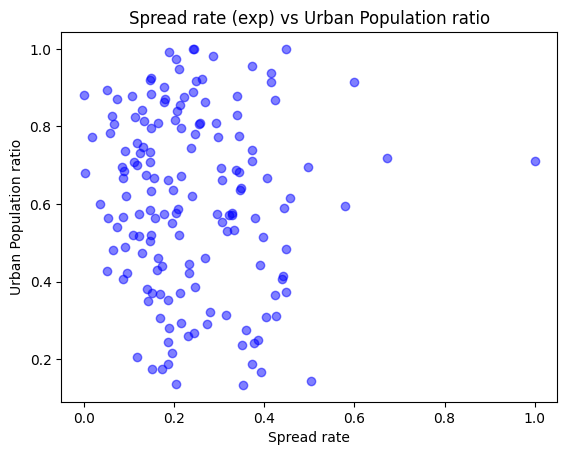

In [14]:
plt.scatter(data_exp['Spread rate'], data_exp['Urban Population']/data_exp['Total Population'], c='blue', alpha=0.5)
plt.xlabel('Spread rate')
plt.ylabel('Urban Population ratio')
plt.title('Spread rate (exp) vs Urban Population ratio')
plt.show()

In [15]:
correxp = data_exp['Spread rate'].corr(data_exp['Urban Population']/data_exp['Total Population'])
print('Correlation coefficient using exponential spread rate: ', correxp)

Correlation coefficient using exponential spread rate:  -0.07597682859124988


Using our spread rate derived from exponential fit, the correlation is very close to zero.

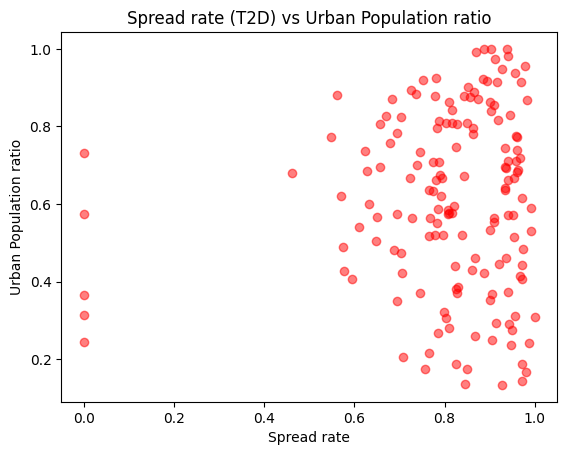

In [16]:
plt.scatter(data_time['Spread rate'], data_time['Urban Population']/data_time['Total Population'], c='red', alpha=0.5)
plt.xlabel('Spread rate')
plt.ylabel('Urban Population ratio')
plt.title('Spread rate (T2D) vs Urban Population ratio')
plt.show()

In [17]:
corrtime = data_time['Spread rate'].corr(data_time['Urban Population']/data_time['Total Population'])
print('Correlation coefficient using time to double spread rate:', corrtime)

Correlation coefficient using time to double spread rate: 0.07239311372707102


The same goes for the correlation using the spread rate derived from the time to double the number of cases.

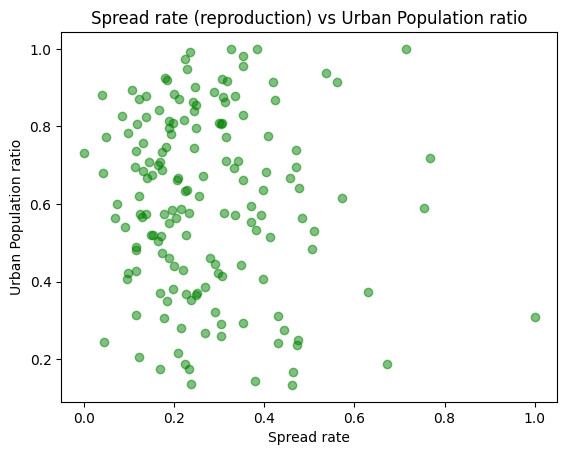

In [18]:
plt.scatter(data_repr['Spread rate'], data_repr['Urban Population']/data_repr['Total Population'], c='green', alpha=0.5)
plt.xlabel('Spread rate')
plt.ylabel('Urban Population ratio')
plt.title('Spread rate (reproduction) vs Urban Population ratio')
plt.show()

In [19]:
correpr = data_repr['Spread rate'].corr(data_repr['Urban Population']/data_repr['Total Population'])
print('Correlation coefficient using reproduction spread rate:', correpr)

Correlation coefficient using reproduction spread rate: -0.08210623412384634


Again, the correlation is very close to zero using the spread rate derived from the daily reproduction number.

## Plotting the countries that would suport the hypothesis of a positive correlation on a world map

### Using the spread rate derived from exponential fit

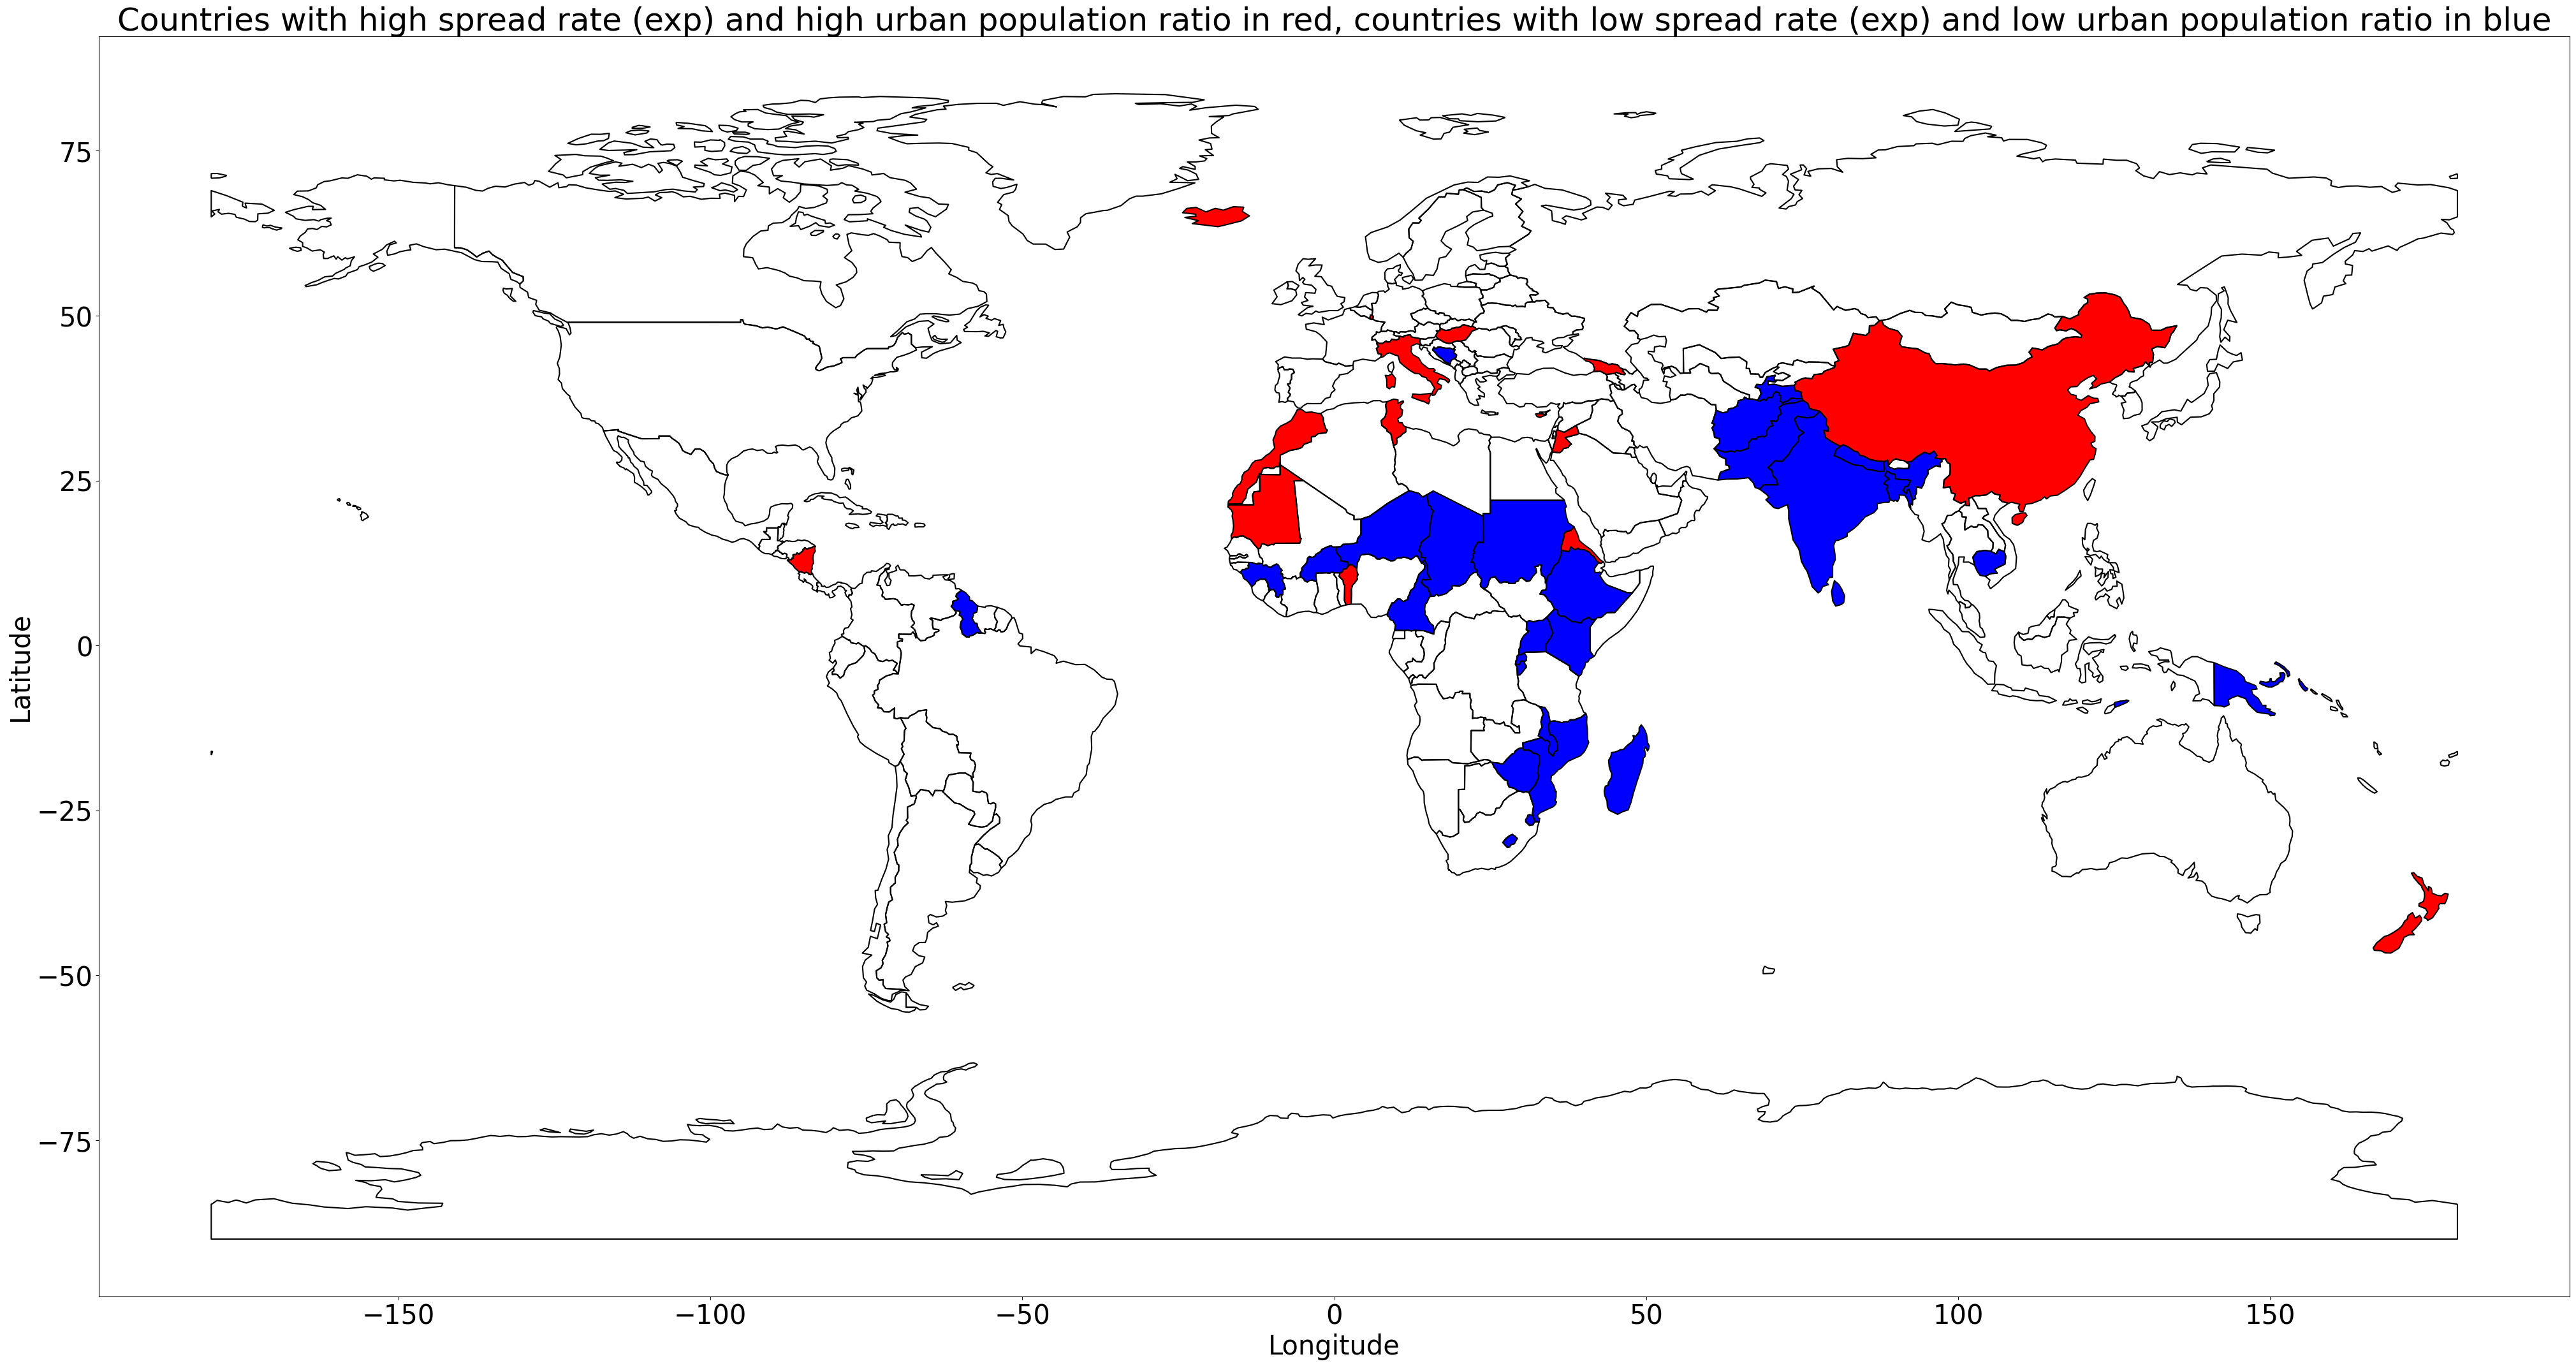

In [20]:
import geopandas as gpd
import difflib


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
map_names = world['name'].values

# Plotting on the map the countries that have a high spread rate and a high urban population ratio
data = data_exp.copy()
high_spread_rate = data['Spread rate'] > 0.4
high_urban_ratio = data['Urban Population']/data['Total Population'] > 0.4
high_spread_rate_urban_ratio = high_spread_rate & high_urban_ratio
data = data[high_spread_rate_urban_ratio]

plt.rcParams.update({'font.size': 30})
fig, ax = plt.subplots(figsize=(50, 50))
world.boundary.plot(ax=ax, edgecolor='black')

# Find the closest match for each country
countries = data['Country']
matches = [difflib.get_close_matches(c, map_names, n=1, cutoff=0.5) for c in countries]
matches = [m[0] if m else None for m in matches]

# Add the matches to the data
data['Map Name'] = matches
data = data.dropna()

# Fill the countries that have a high spread rate and a high urban population ratio with red
for i, row in data.iterrows():
    name = row['Map Name']
    world[world['name'] == name].plot(ax=ax, color='red')

# Plotting on the map the countries that have a low spread rate and a low urban population ratio
data = data_exp.copy()
low_spread_rate = data['Spread rate'] < 0.4
low_urban_ratio = data['Urban Population']/data['Total Population'] < 0.4
low_spread_rate_urban_ratio = low_spread_rate & low_urban_ratio
data = data[low_spread_rate_urban_ratio]

# Find the closest match for each country
countries = data['Country']
matches = [difflib.get_close_matches(c, map_names, n=1, cutoff=0.5) for c in countries]
matches = [m[0] if m else None for m in matches]

# Add the matches to the data
data['Map Name'] = matches
data = data.dropna()

# Fill the countries that have a low spread rate and a low urban population ratio with blue
for i, row in data.iterrows():
    name = row['Map Name']
    world[world['name'] == name].plot(ax=ax, color='blue')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Countries with high spread rate (exp) and high urban population ratio in red, countries with low spread rate (exp) and low urban population ratio in blue')
plt.show()

### Using the spread rate derived from the time to double the number of cases

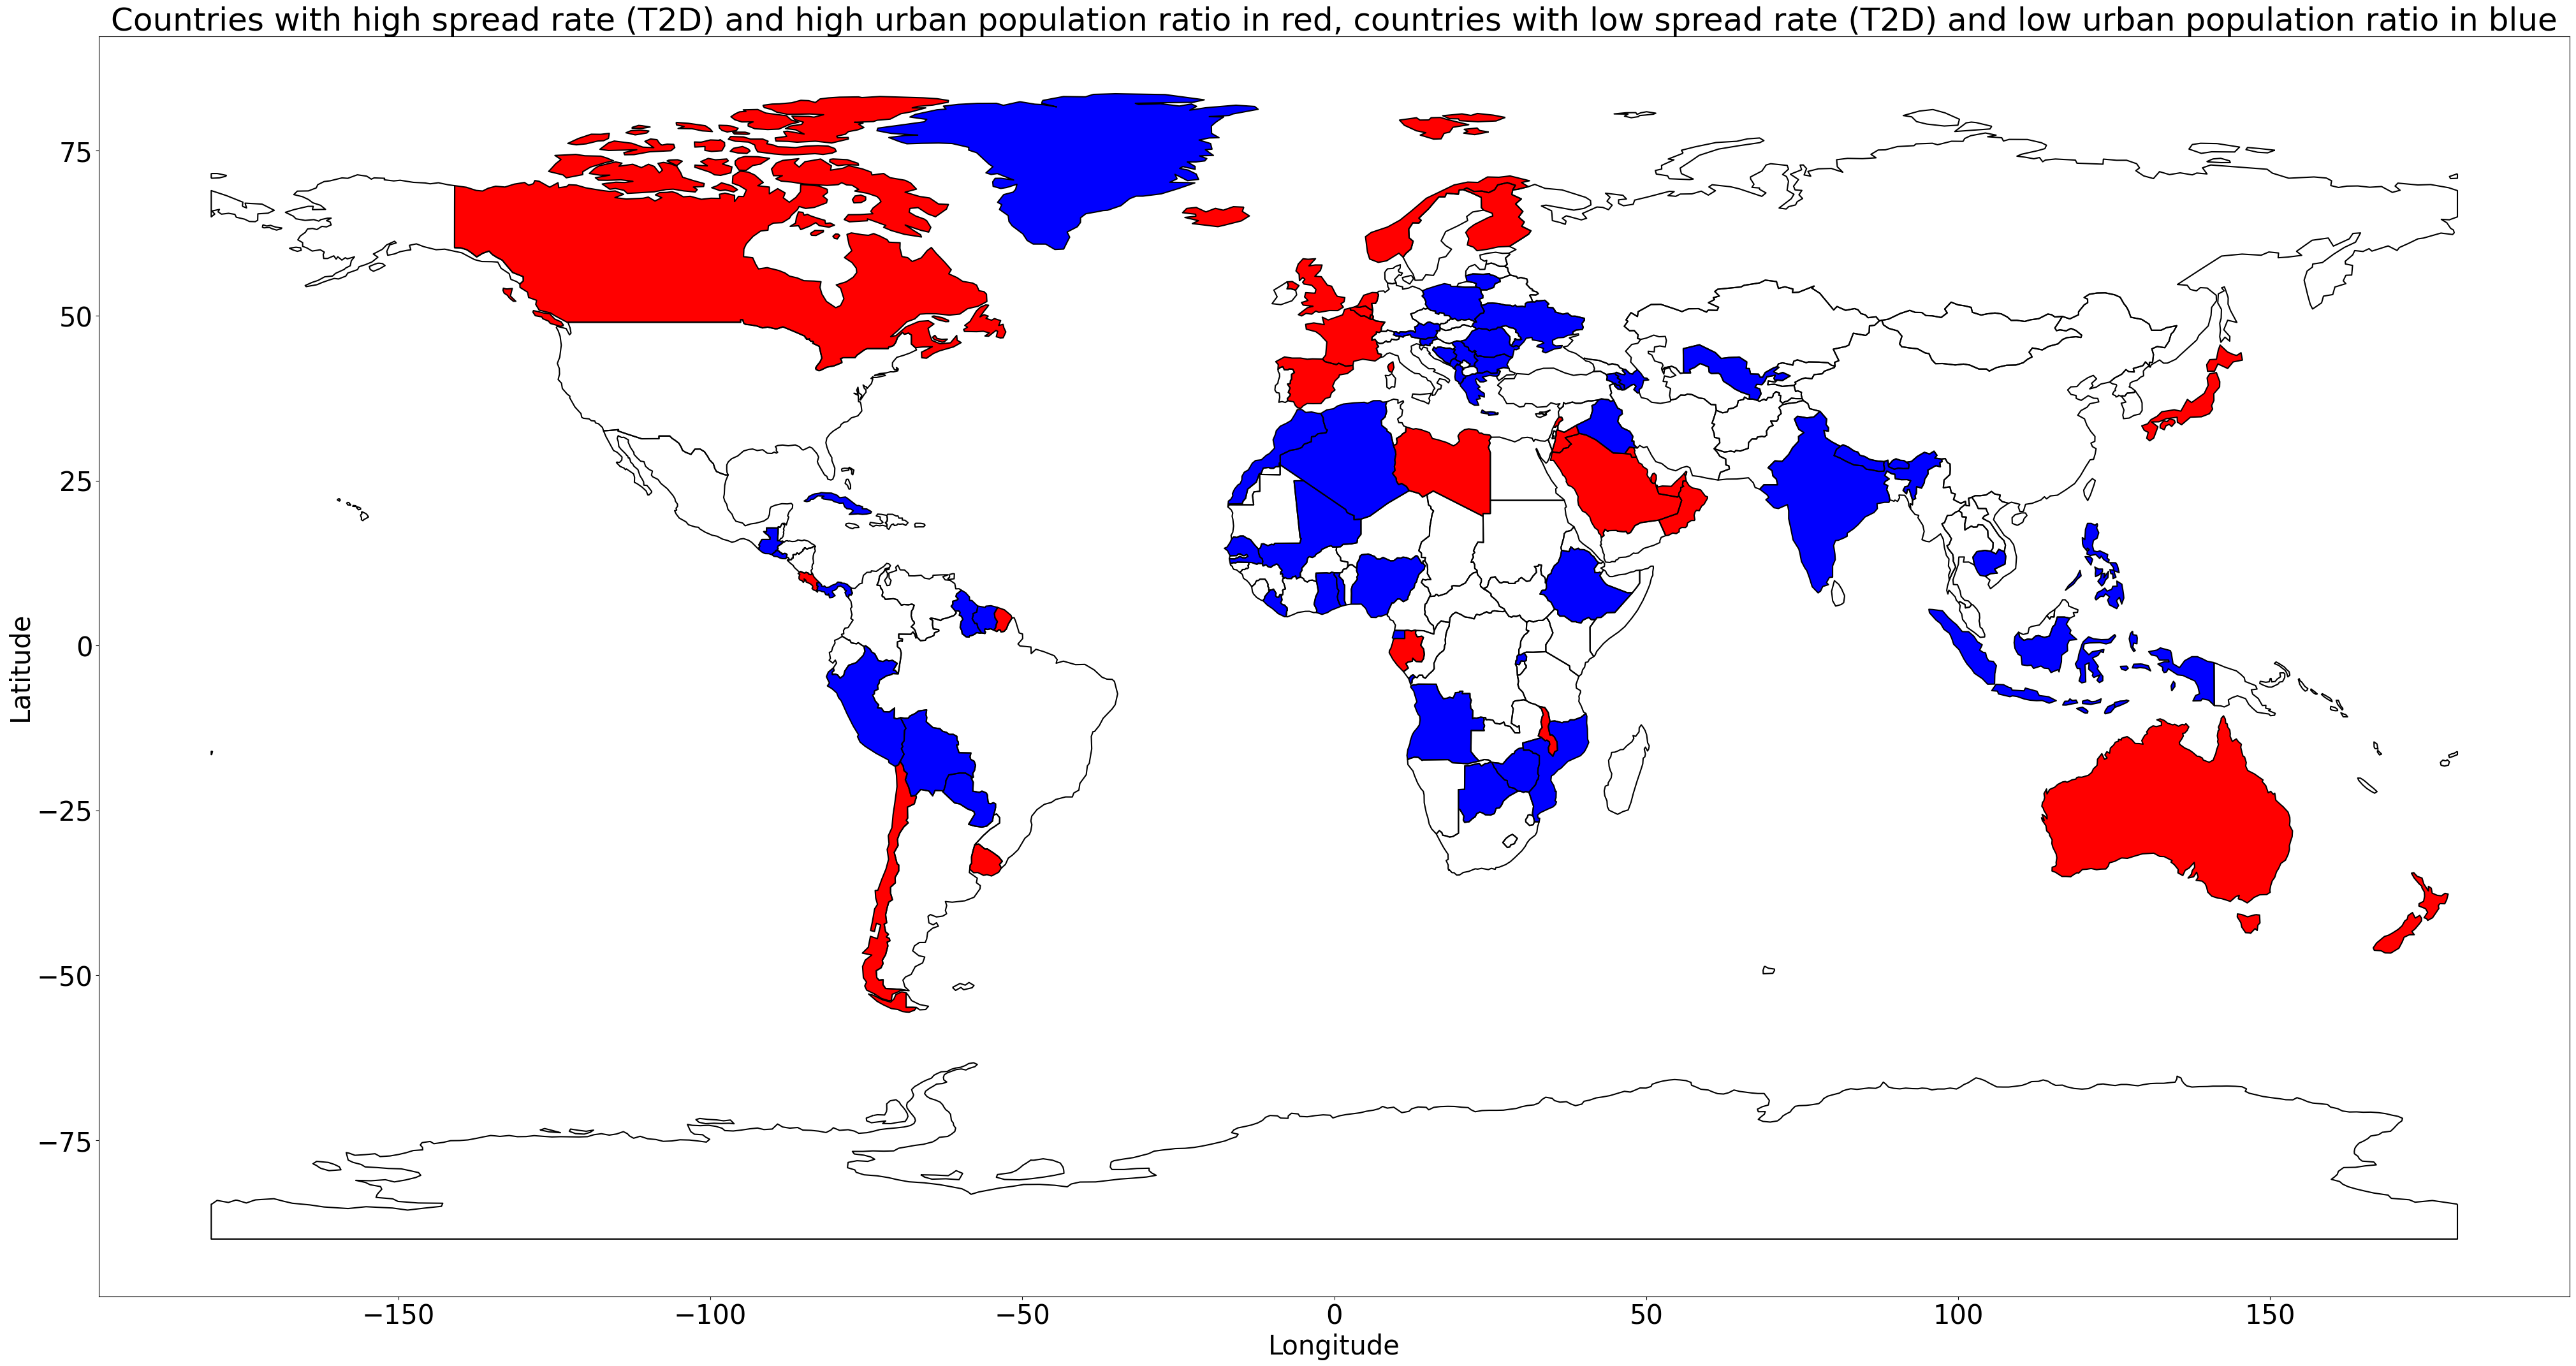

In [21]:
import geopandas as gpd
import difflib


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
map_names = world['name'].values

# Plotting on the map the countries that have a high spread rate and a high urban population ratio
data = data_time.copy()
high_spread_rate = data['Spread rate'] > 0.8
high_urban_ratio = data['Urban Population']/data['Total Population'] > 0.8
high_spread_rate_urban_ratio = high_spread_rate & high_urban_ratio
data = data[high_spread_rate_urban_ratio]

plt.rcParams.update({'font.size': 30})
fig, ax = plt.subplots(figsize=(50, 50))
world.boundary.plot(ax=ax, edgecolor='black')

# Find the closest match for each country
countries = data['Country']
matches = [difflib.get_close_matches(c, map_names, n=1, cutoff=0.5) for c in countries]
matches = [m[0] if m else None for m in matches]

# Add the matches to the data
data['Map Name'] = matches
data = data.dropna()

# Fill the countries that have a high spread rate and a high urban population ratio with red
for i, row in data.iterrows():
    name = row['Map Name']
    world[world['name'] == name].plot(ax=ax, color='red')

# Plotting on the map the countries that have a low spread rate and a low urban population ratio
data = data_time.copy()
low_spread_rate = data['Spread rate'] < 0.8
low_urban_ratio = data['Urban Population']/data['Total Population'] < 0.8
low_spread_rate_urban_ratio = low_spread_rate & low_urban_ratio
data = data[low_spread_rate_urban_ratio]

# Find the closest match for each country
countries = data['Country']
matches = [difflib.get_close_matches(c, map_names, n=1, cutoff=0.5) for c in countries]
matches = [m[0] if m else None for m in matches]

# Add the matches to the data
data['Map Name'] = matches
data = data.dropna()

# Fill the countries that have a low spread rate and a low urban population ratio with blue
for i, row in data.iterrows():
    name = row['Map Name']
    world[world['name'] == name].plot(ax=ax, color='blue')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Countries with high spread rate (T2D) and high urban population ratio in red, countries with low spread rate (T2D) and low urban population ratio in blue')
plt.show()

No real meaning to that, I just wanted to see how it would look like.

Also I'm sure there would be a way to plot a similar map to dishonestly support the hypothesis of a positive correlation.